# Image Classification Using Neural Networks
---
## Introduction

My name is **Nikos**, and this project along with others in this folder mark a significant milestone in my journey to becoming an AI Engineer. I’m passionate about artificial intelligence and machine learning, and this project serves as the first step in that path. Through it, I aim to not only understand how neural networks work but also demonstrate the practical applications of AI in real-world problems.

In this project, we’ll be working with the **MNIST dataset**, which consists of grayscale images of handwritten digits. This dataset has become a classic starting point for AI learners, and I hope that sharing my experience can inspire others who are also at the beginning of their AI journey.

Together, we will explore:
- **Data Preprocessing**: How to transform image data into a format that can be used by neural networks.
- **Model Building**: Designing and training a neural network from scratch, with clear explanations of each component.
- **Model Evaluation**: How to evaluate the performance of our model and ensure it generalizes well to unseen data.
- **Custom Image Testing**: Extending the project by testing the model on real-world images beyond the MNIST dataset.

As I write this, I’m learning step by step, building a solid understanding of how AI models work. This project is designed not only to help me, but to **inspire other beginners** to start their own journey. If you’re new to AI, consider this project a **guiding light**—breaking down complex concepts into practical, understandable steps.

## Key Technologies:
- **TensorFlow/Keras**: Tools for building and training neural networks with minimal complexity.
- **NumPy**: For managing numerical computations and manipulating data.
- **Matplotlib**: For visualizing performance metrics and understanding the model’s learning process.
- **PIL**: To handle and preprocess images for testing custom inputs.

## Why This Project Matters for Beginners:
As a beginner in AI, it’s easy to feel overwhelmed by the complexity of the field. However, working on a project like this is a great way to build confidence and momentum. Image classification is one of the foundational tasks in AI, and mastering it gives us the skills to tackle more complex problems like **object detection**, **natural language processing**, and even **autonomous systems**.

> This project is not just about classifying digits—it's about taking that first step towards a much larger world. I’m excited to share this journey with you, and I hope it encourages you to explore the possibilities of AI. The road ahead is full of learning, creativity, and exciting challenges, and I can’t wait to see where it takes us.

Let’s get started and make our first major step into the field of artificial intelligence!

---
By the end of this project, I will have built a simple yet powerful neural network capable of classifying digits from the MNIST dataset, and I hope this project will be useful to others who are starting their own AI journey.


In [130]:
import numpy as np  # Import NumPy, a library for handling arrays and numerical operations
from tensorflow.keras.datasets import mnist  # Import the MNIST dataset directly from Keras (pre-split into train/test sets)
from tensorflow.keras.utils import to_categorical  # For one-hot encoding the labels (converting digit labels into binary class matrices)
from tensorflow.keras.regularizers import l2  # Import L2 regularization to penalize large weights and prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping to halt training when validation performance stops improving
from tensorflow.keras.models import Sequential  # Import Sequential to define a linear stack of layers for the neural network
from tensorflow.keras.layers import Dense, Dropout  # Import Dense for fully connected layers and Dropout to randomly drop neurons during training to reduce overfitting
import matplotlib.pyplot as plt  # Import Matplotlib for visualizing the data, loss, and accuracy plots

---
## Loading Dataset

The mnist.load_data() function loads the MNIST dataset. It returns two tuples:

- X_train and y_train: Training data (images and labels).

- X_test and y_test: Testing data (images and labels).

Each image is 28x28 pixels, and each label represents a digit (0-9).

---

In [131]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Its always good to get a feel of our sample.

In [132]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (60000, 28, 28), (60000,)
Test set: (10000, 28, 28), (10000,)


---
## PreProcessing

- **Normalization**: Divides the pixel values by 255 to scale them between 0 and 1.

- **Reshape**: Flattens each 28x28 image into a 1D array of length 784 (28 * 28) for easier input into a fully connected neural network.

---

In [133]:
def preprocess_mnist_image(image):
    image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    image = image.reshape(1, -1)  # Flatten the image to 1D array
    return image


In [134]:
sample_image = preprocess_mnist_image(X_train[0])
print(f"Sample image shape (flattened): {sample_image.shape}")


Sample image shape (flattened): (1, 784)


In [135]:
X_train_processed = np.array([preprocess_mnist_image(image) for image in X_train])
X_train_processed = X_train_processed.reshape(-1, 784)

X_test_processed = np.array([preprocess_mnist_image(image) for image in X_test])
X_test_processed = X_test_processed.reshape(-1, 784)

---
We apply the preprocessing function to every image in the training and test datasets.

The shape of each image is converted from (28, 28) to (1, 784), and we reshape it to make the final shape (60,000, 784) for the training set.

---

In [136]:
print(f"Processed X_train shape: {X_train_processed.shape}")
print(f"Processed X_test shape: {X_test_processed.shape}")

Processed X_train shape: (60000, 784)
Processed X_test shape: (10000, 784)


---
**One-hot encoding** converts the numeric labels (0-9) into vectors where only one element is 1, representing the digit, and the rest are 0.

For example, y_train[0] might be 5, and after encoding it becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0].

---

In [137]:
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [138]:
print(f"First label before encoding: {y_train[0]}")
print(f"First label after encoding: {y_train_encoded[0]}")

First label before encoding: 5
First label after encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [139]:
print(f"Final X_train shape: {X_train_processed.shape}")
print(f"Final y_train shape: {y_train_encoded.shape}")
print(f"Final X_test shape: {X_test_processed.shape}")
print(f"Final y_test shape: {y_test_encoded.shape}")

Final X_train shape: (60000, 784)
Final y_train shape: (60000, 10)
Final X_test shape: (10000, 784)
Final y_test shape: (10000, 10)


---
## Building the Neural Network Model
We’ll use Keras from TensorFlow to build a simple feed-forward neural network. The architecture will consist of:

Input layer: Corresponding to the flattened 784-dimensional input (28x28 pixels).
Hidden layers: One or two fully connected layers with ReLU activation.
Output layer: A softmax layer with 10 neurons (one for each digit, 0-9) since this is a classification problem.

---

In [140]:
# Step 1: Build the model
model = Sequential()

# Input layer + Hidden layer 1: 128 neurons, ReLU activation
model.add(Dense(128, input_dim=784, activation='relu'))

# Hidden layer 2: 64 neurons, ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer: 10 neurons (one for each class), Softmax activation
model.add(Dense(10, activation='softmax'))

# Step 2: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the model summary
model.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

---
**Explanation:**

- Input layer: input_dim=784 because each MNIST image has been flattened to 784 features.

- Hidden layers: Two fully connected (dense) layers with ReLU activation.

- Output layer: 10 neurons for the 10 classes (digits 0-9), with softmax activation to provide class probabilities.

- Compile: We use the Adam optimizer and categorical crossentropy loss function since it's a multi-class classification task.

---

## Training the Neural Network Model
Now, we’ll train the model on the training data.

In [141]:
history = model.fit(X_train_processed, y_train_encoded, validation_data=(X_test_processed, y_test_encoded), epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 608us/step - accuracy: 0.8747 - loss: 0.4328 - val_accuracy: 0.9625 - val_loss: 0.1313
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.9677 - loss: 0.1064 - val_accuracy: 0.9713 - val_loss: 0.0937
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9789 - loss: 0.0683 - val_accuracy: 0.9751 - val_loss: 0.0852
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9828 - loss: 0.0501 - val_accuracy: 0.9760 - val_loss: 0.0826
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9768 - val_loss: 0.0815
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9764 - val_loss: 0.0826
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9781 - val_loss: 0.0796
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.9923 -

---
**Explanation:**

- fit(): Trains the model using the training data.

- X_train_processed: Preprocessed training images.

- y_train_encoded: One-hot encoded training labels.

- validation_data: The test set is used to validate the model after each epoch.

- epochs: The number of times the model will train over the full dataset.

- batch_size: The number of samples per gradient update.

---
## Evaluating the Model

In [142]:
test_loss, test_acc = model.evaluate(X_test_processed, y_test_encoded)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9743 - loss: 0.2492
Test accuracy: 0.9781000018119812


---
**Explanation:**

- evaluate(): Tests the model on unseen data (the test set) and returns the loss and accuracy.

- test_acc: The accuracy of the model on the test data, showing how well the model generalizes.

## Visualizing the Training Process

You can visualize the training process (loss and accuracy) using Matplotlib.

---

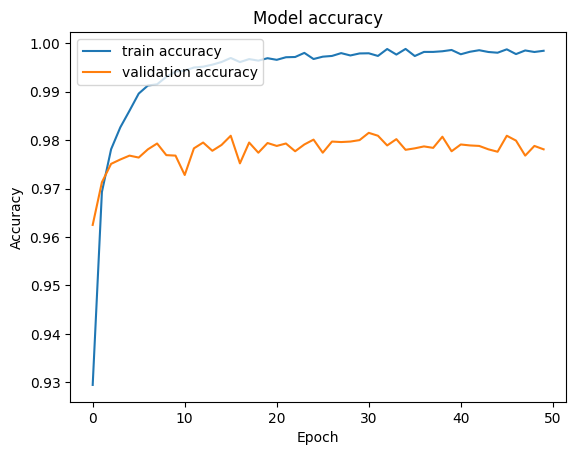

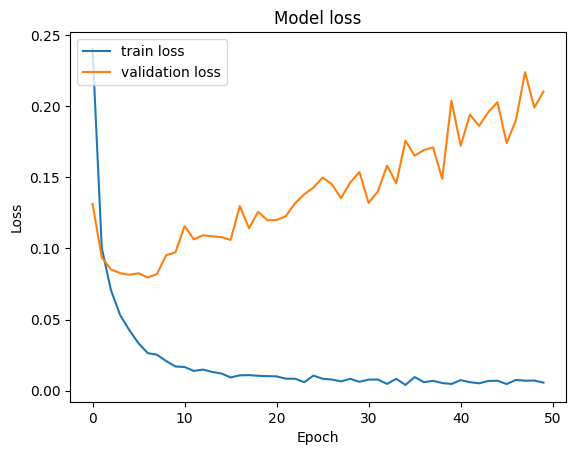

In [143]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


---
**Training Accuracy vs Validation Accuracy:**

- The training accuracy is nearly 1.0 (perfect), which means our model is performing extremely well on the training data.

- However, the validation accuracy fluctuates around 0.98, and there is a noticeable gap between the training and validation accuracy.

**Training Loss vs Validation Loss:**

- The training loss is very low and decreases consistently over time, showing the model is optimizing on the training data.

- However, the validation loss increases over time, indicating that the model is not generalizing well to unseen data and is overfitting the training set.

What Does This Mean?

---

## Overfitting: 

Our model is overfitting the training data, as indicated by the large gap between training accuracy and validation accuracy, and the validation loss consistently increasing. This happens when the model learns the specific details and noise of the training data, losing its ability to generalize to new data.

In [144]:
# Step 1: Build the model with Dropout and L2 regularization
model = Sequential()

# Input layer + Hidden layer 1: 128 neurons, ReLU activation, L2 regularization
model.add(Dense(128, input_dim=784, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Hidden layer 2: 64 neurons, ReLU activation, L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Output layer: 10 neurons (one for each class), Softmax activation
model.add(Dense(10, activation='softmax'))

# Step 2: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 4: Train the model with early stopping
history = model.fit(X_train_processed, y_train_encoded, validation_data=(X_test_processed, y_test_encoded),
                    epochs=50, batch_size=32, callbacks=[early_stopping])

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_processed, y_test_encoded)
print(f"Test accuracy: {test_acc}")


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.6921 - loss: 1.8236 - val_accuracy: 0.9170 - val_loss: 0.6017
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.8572 - loss: 0.8064 - val_accuracy: 0.9247 - val_loss: 0.5653
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.8693 - loss: 0.7449 - val_accuracy: 0.9270 - val_loss: 0.5239
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8727 - loss: 0.7229 - val_accuracy: 0.9303 - val_loss: 0.5145
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.8767 - loss: 0.7038 - val_accuracy: 0.9325 - val_loss: 0.5135
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.8804 - loss: 0.6935 - val_accuracy: 0.9300 - val_loss: 0.5019
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.8816 - loss: 0.6782 - val_accuracy: 0.9373 - val_loss: 0.4912
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8823 -

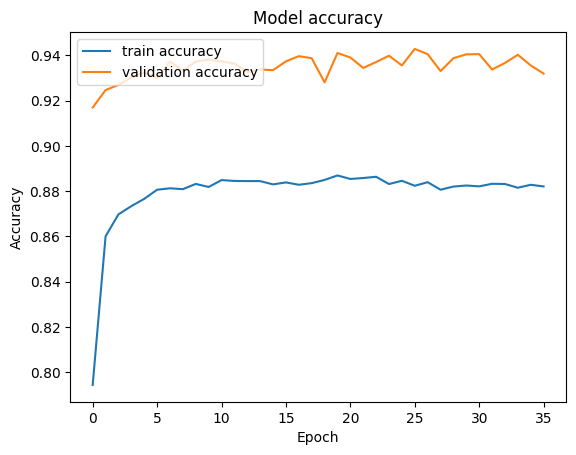

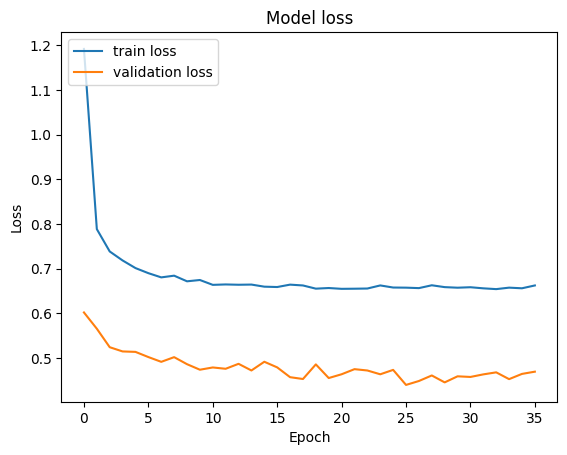

In [145]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


---
**Training vs Validation Accuracy:**

- The validation accuracy is now very close to the training accuracy, indicating much better generalization. This means that the model is performing well not just on the training data but also on the unseen validation set.

- There is no longer a large gap between training and validation accuracy, suggesting that dropout and L2 regularization helped prevent the model from overfitting.

**Training vs Validation Loss:**

- The training loss and validation loss curves have stabilized, and both are converging without diverging. The training loss is still slightly higher than the validation loss, but this is acceptable because regularization (especially L2) tends to increase the training loss slightly as it penalizes large weights.
  
- The validation loss has remained low and fairly stable over time, indicating that the model is learning well without overfitting.

**Analysis:**

- Dropout: By dropping random neurons during training, the model became less dependent on specific neurons, reducing overfitting and improving generalization.

- L2 Regularization: By penalizing large weights, the model avoided becoming too complex and learned a smoother, more general solution.

- Early Stopping: Likely prevented the model from training unnecessarily after reaching optimal performance.

---

**Next Steps:**

- Hyperparameter tuning: You could experiment further by tuning the dropout rate (e.g., 0.3, 0.4) or adjusting the L2 regularization strength.

- Increase epochs: Now that the model is generalizing better, you might allow the model to train for more epochs to see if performance continues to improve.

- Test on new data: You might test the model on completely new data to see how it performs on unseen data outside your validation set.

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step - accuracy: 0.7788 - loss: 1.5399 - val_accuracy: 0.9229 - val_loss: 0.5566
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.8875 - loss: 0.6594 - val_accuracy: 0.9384 - val_loss: 0.4905
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.9015 - loss: 0.5961 - val_accuracy: 0.9341 - val_loss: 0.4687
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.9056 - loss: 0.5734 - val_accuracy: 0.9411 - val_loss: 0.4410
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.9065 - loss: 0.5560 - val_accuracy: 0.9418 - val_loss: 0.4397
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9121 - loss: 0.5373 - val_accuracy: 0.9467 - val_loss: 0.4362
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.9144 - loss: 0.5309 - val_accuracy: 0.9404 - val_loss: 0.4313
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 

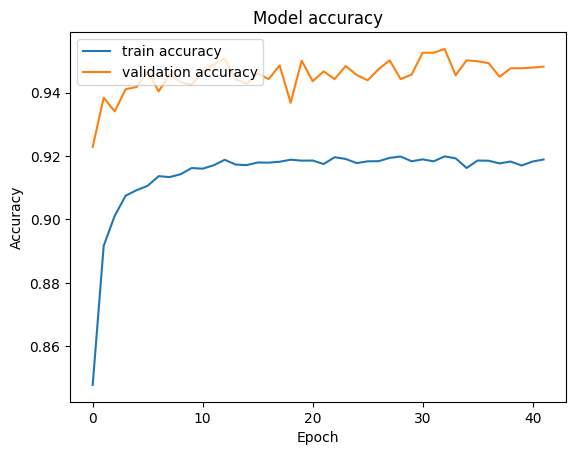

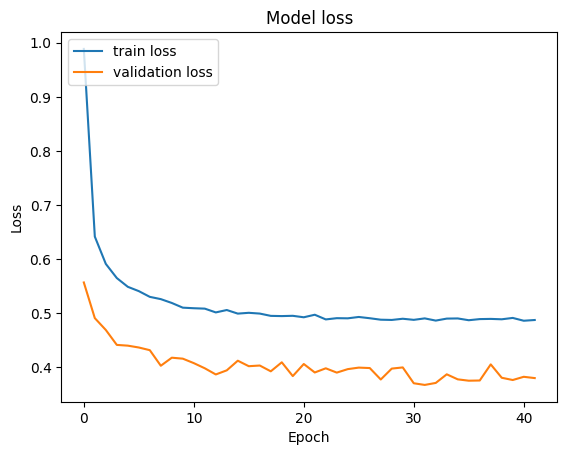

In [146]:
# Step 1: Build the model with Dropout and L2 regularization
model = Sequential()

# Input layer + Hidden layer 1: 128 neurons, ReLU activation, L2 regularization
model.add(Dense(128, input_dim=784, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Hidden layer 2: 64 neurons, ReLU activation, L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))

# Output layer: 10 neurons (one for each class), Softmax activation
model.add(Dense(10, activation='softmax'))

# Step 2: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 4: Train the model with early stopping
history = model.fit(X_train_processed, y_train_encoded, validation_data=(X_test_processed, y_test_encoded),
                    epochs=100, batch_size=32, callbacks=[early_stopping])

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_processed, y_test_encoded)
print(f"Test accuracy: {test_acc}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


---
## Testing the Model on MNIST Test Set:

To test the model on the test images from the MNIST dataset, you can do the following:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


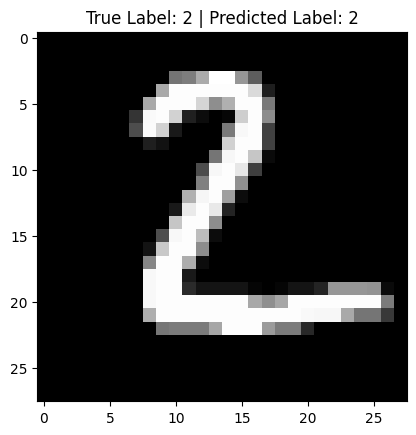

Image 1 - PREDICTION: 2, TRUE LABEL: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


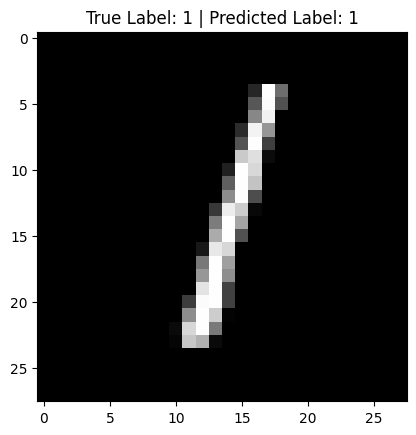

Image 2 - PREDICTION: 1, TRUE LABEL: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


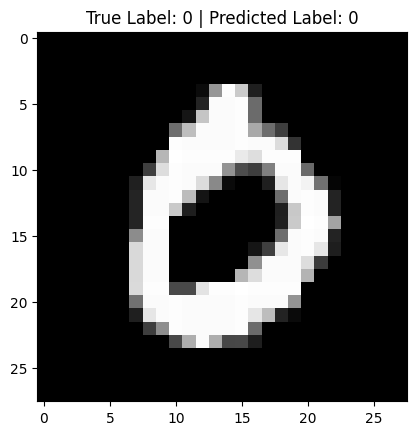

Image 3 - PREDICTION: 0, TRUE LABEL: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


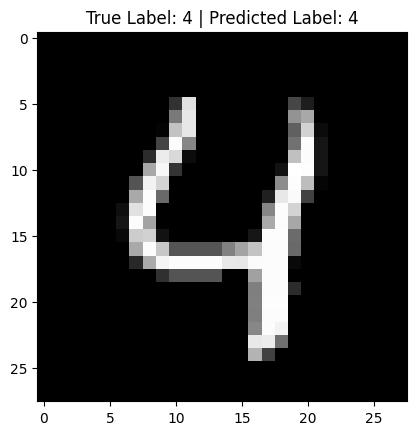

Image 4 - PREDICTION: 4, TRUE LABEL: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


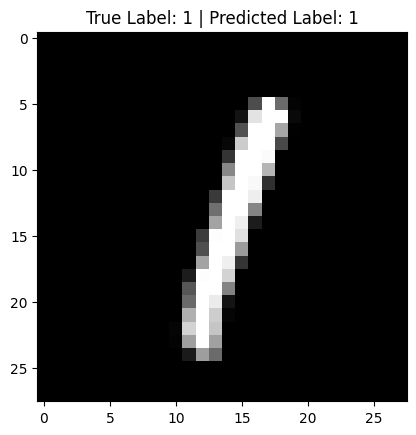

Image 5 - PREDICTION: 1, TRUE LABEL: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


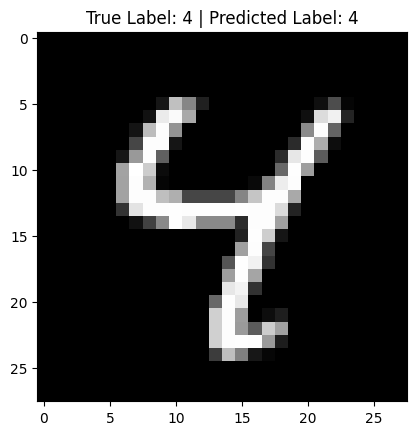

Image 6 - PREDICTION: 4, TRUE LABEL: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


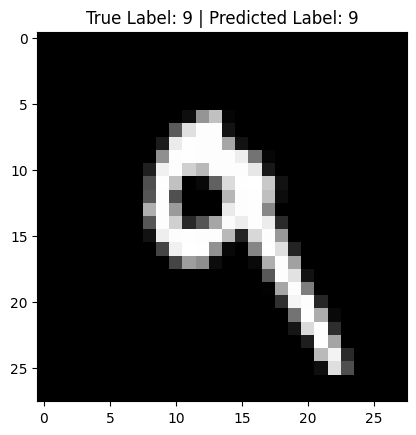

Image 7 - PREDICTION: 9, TRUE LABEL: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


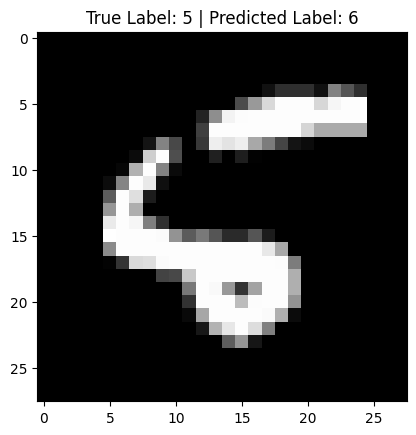

Image 8 - PREDICTION: 6, TRUE LABEL: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


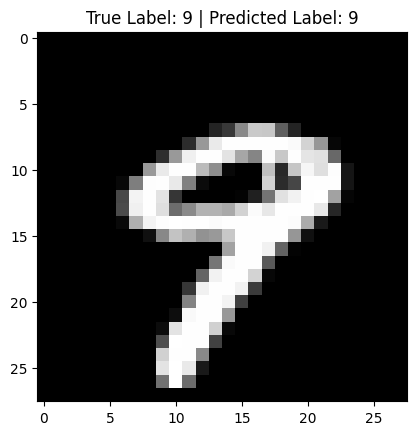

Image 9 - PREDICTION: 9, TRUE LABEL: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


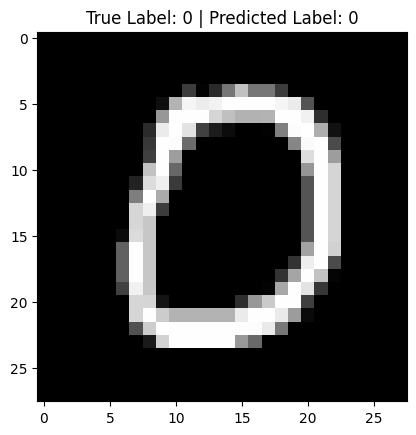

Image 10 - PREDICTION: 0, TRUE LABEL: 0


In [147]:
# Loop through test images from index 1 to 10
for index in range(1, 11):
    # Step 1: Get the test image and the true label
    test_image = X_test_processed[index].reshape(1, 784)  # Reshape it for the model input
    true_label = y_test[index]  # Get the true label

    # Step 2: Predict the class using the trained model
    prediction = model.predict(test_image)
    predicted_label = prediction.argmax()

    # Step 3: Display the image and prediction
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True Label: {true_label} | Predicted Label: {predicted_label}")
    plt.show()

    # Step 4: Output the prediction
    print(f"Image {index} - PREDICTION: {predicted_label}, TRUE LABEL: {true_label}")


---
### Testing on Custom Images
Here we demonstrate how the model performs on custom images from outside the dataset, showing the preprocessing steps and final predictions.


- Ensure that the image is a handwritten digit or something resembling the MNIST dataset.

- Preprocessing the Image:

- Convert the image to grayscale.

- Resize it to 28x28 pixels (the same size as MNIST images).

- Normalize the pixel values (scale them between 0 and 1).

- Flatten the image into a 1D array (784 pixels) for the model.

---

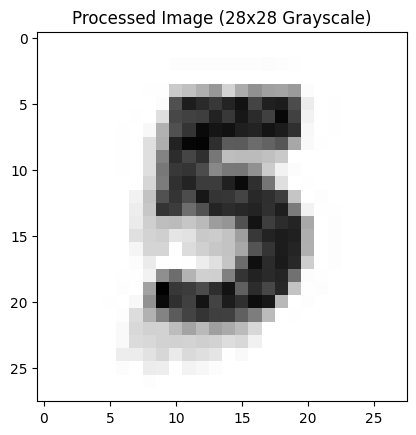

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
PREDICTION: 8


In [148]:
from PIL import Image, ImageOps

# Function to preprocess the image for the MNIST model
def preprocess_custom_image(image_path):
    # Step 1: Open the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    
    # Step 2: Resize to 28x28 pixels (same as MNIST dataset) using LANCZOS
    img = img.resize((28, 28), Image.Resampling.LANCZOS)
    
    # Step 3: Visualize the processed image
    plt.imshow(img, cmap='gray')
    plt.title('Processed Image (28x28 Grayscale)')
    plt.show()

    # Step 4: Convert the image to a numpy array and normalize pixel values (0 to 1)
    img_array = np.array(img).astype('float32') / 255.0
    
    # Step 5: Flatten the image to a 1D array (same as input format for MNIST)
    img_array = img_array.reshape(1, 784)
    
    return img_array

# Example usage:
image_path = 'number.jpg'
custom_image = preprocess_custom_image(image_path)

# Step 6: Predict the digit
prediction = model.predict(custom_image)
predicted_label = prediction.argmax()

# Step 7: Output the prediction
print(f'PREDICTION: {predicted_label}')


---
# WRONG! 

If the background of the image is white and the digit is black, that would be the opposite of how MNIST digits are typically formatted. In the MNIST dataset, the background is black (pixel values close to 0) and the digits are white (pixel values close to 1).

To adjust for this, we can invert the colors of the image and then reprocess it to match the format of MNIST.

---

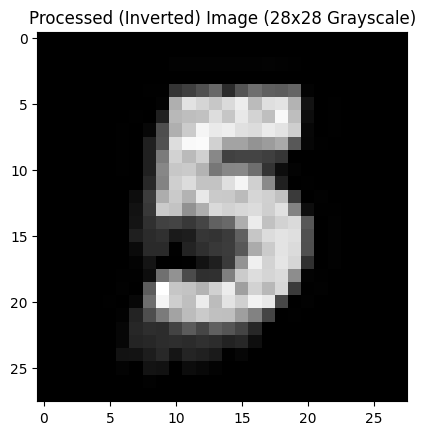

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
PREDICTION: 5


In [149]:
# Function to preprocess the image for the MNIST model
def preprocess_custom_image(image_path):
    # Step 1: Open the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    
    # Step 2: Invert the image colors (if background is white and digit is black)
    img = ImageOps.invert(img)
    
    # Step 3: Resize to 28x28 pixels (same as MNIST dataset)
    img = img.resize((28, 28), Image.Resampling.LANCZOS)
    
    # Step 4: Visualize the processed (inverted) image
    plt.imshow(img, cmap='gray')
    plt.title('Processed (Inverted) Image (28x28 Grayscale)')
    plt.show()

    # Step 5: Convert the image to a numpy array and normalize pixel values (0 to 1)
    img_array = np.array(img).astype('float32') / 255.0
    
    # Step 6: Flatten the image to a 1D array (same as input format for MNIST)
    img_array = img_array.reshape(1, 784)
    
    return img_array

# Example usage:
image_path = 'number.jpg'
custom_image = preprocess_custom_image(image_path)

# Step 7: Predict the digit
prediction = model.predict(custom_image)
predicted_label = prediction.argmax()

# Step 8: Output the prediction
print(f'PREDICTION: {predicted_label}')


The fact that the prediction worked correctly after inverting the colors confirms an important point:

---

## Data Format Consistency is Crucial:

The MNIST dataset has images where the digits are white on a black background, while our test image was black on a white background. The model was trained to recognize white digits, so when presented with the opposite color scheme, it couldn't generalize well.

After inverting the image colors, the format matched the training data (MNIST), allowing the model to correctly classify the digit.

## Preprocessing Matters:

Image preprocessing is a critical step in any machine learning pipeline. Ensuring that the input data is in the same format (grayscale, size, orientation, etc.) as the training data is essential for the model to make accurate predictions.

In this case, the color inversion fixed the issue by matching the pixel value distribution of the MNIST training images.

## Model Sensitivity to Image Representation:

This experiment shows that models trained on specific representations (like MNIST's white-on-black digits) can be sensitive to how data is presented. Even though the digit was the same, the representation (black digit on white background) caused the initial misclassification.

---

## Conclusion:

Consistency between training and test data is key to good model performance.

Always ensure that any custom input data is preprocessed to closely match the data used to train the model (including color scheme, scaling, normalization, etc.).
In cases where the data format might vary, you can apply preprocessing techniques (like color inversion) to align the format with the training set.

---

### Future Improvements
- Use a CNN architecture for better performance on image data.
- Experiment with different optimizers such as Adam for faster convergence.
- Perform hyperparameter tuning to optimize model performance.